# Titanic Classification

### Exploratory Data Analysis

In [1]:
# Import necessary libraries
import pandas as pd

# Load dataset
df_train = pd.read_csv('titanic/train.csv')
df_test = pd.read_csv('titanic/test.csv')

#### Training Data

In [2]:
# Show first 5 rows of the dataset
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Show information about the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Check for missing values in the dataset
df_train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [5]:
# Drop Unnecessary Columns
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [6]:
# Fill in missing age values with the mean age
mean_age = df_train['Age'].mean()
df_train['Age'].fillna(mean_age, inplace=True)

In [7]:
# Check for duplicates in the dataset
df_train.duplicated().sum()

114

In [8]:
# Drop duplicates
df_train.drop_duplicates()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.000000,1,0,7.2500
1,1,1,female,38.000000,1,0,71.2833
2,1,3,female,26.000000,0,0,7.9250
3,1,1,female,35.000000,1,0,53.1000
4,0,3,male,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.1250
887,1,1,female,19.000000,0,0,30.0000
888,0,3,female,29.699118,1,2,23.4500
889,1,1,male,26.000000,0,0,30.0000


In [9]:
# Check for inconsistent values in the Age column
df_train[df_train['Age'] < 0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare


#### Testing Data

In [10]:
# Show information about the testing dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
# Check for missing values in the dataset
df_test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [12]:
# Drop Unnecessary Columns
df_test = df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [13]:
# Fill in missing age values with the mean age
mean_age = df_test['Age'].mean()
df_test['Age'].fillna(mean_age, inplace=True)

# Fill in missing Fare values
from sklearn.impute import SimpleImputer

# Create a SimpleImputer object with strategy='median'
imputer = SimpleImputer(strategy='median')

# Fit the imputer to the "fare" column
imputer.fit(df_test[['Fare']])

# Transform the "fare" column
df_test['Fare'] = imputer.transform(df_test[['Fare']])

In [14]:
# Check for duplicates in the dataset
df_test.duplicated().sum()

40

In [15]:
# Drop duplicates
df_test.drop_duplicates()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.50000,0,0,7.8292
1,3,female,47.00000,1,0,7.0000
2,2,male,62.00000,0,0,9.6875
3,3,male,27.00000,0,0,8.6625
4,3,female,22.00000,1,1,12.2875
...,...,...,...,...,...,...
411,1,female,37.00000,1,0,90.0000
412,3,female,28.00000,0,0,7.7750
414,1,female,39.00000,0,0,108.9000
415,3,male,38.50000,0,0,7.2500


In [16]:
# Check for inconsistent values in the Age column
df_test[df_test['Age'] < 0]

,Pclass,Sex,Age,SibSp,Parch,Fare


### Data Visualization (Only for training data)

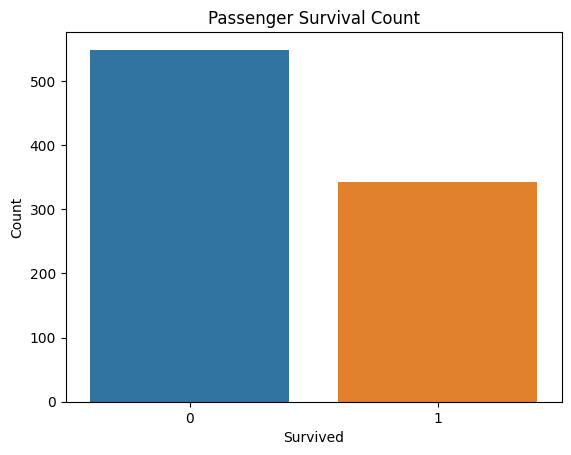

In [17]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart to show the number of passengers who survived and did not survive
sns.countplot(x="Survived", data=df_train)

# Set the title and labels
plt.title("Passenger Survival Count")
plt.xlabel("Survived")
plt.ylabel("Count")

# Show the plot
plt.show()

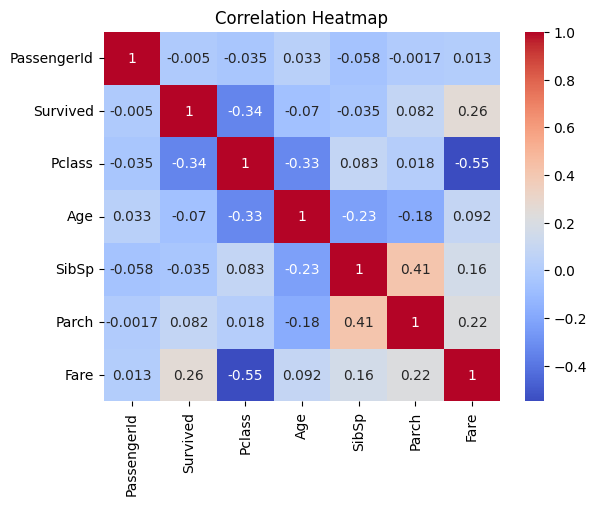

In [18]:
# Load the Titanic dataset from a CSV file
titanic = pd.read_csv('titanic/train.csv')

# Remove non-numeric columns
titanic = titanic.select_dtypes(include=['int64', 'float64'])

# Replace missing values with the mean
titanic.fillna(titanic.mean(), inplace=True)

# Create a heatmap of the correlation between all features
corr = titanic.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

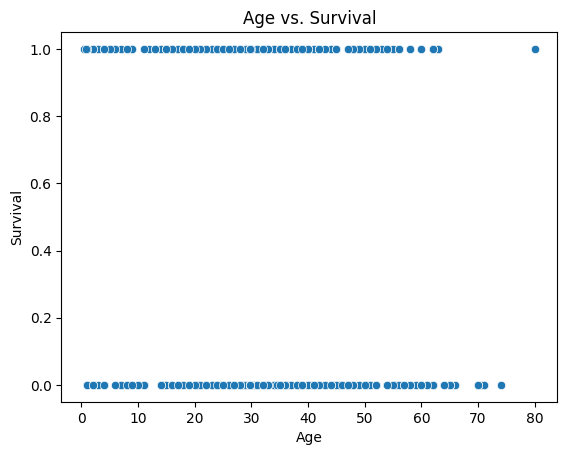

In [19]:
# Create a scatterplot to visualize the relationship between age and survival
sns.scatterplot(y="Survived", x="Age", data=df_train)

plt.title("Age vs. Survival")
plt.xlabel("Age")
plt.ylabel("Survival")

plt.show()

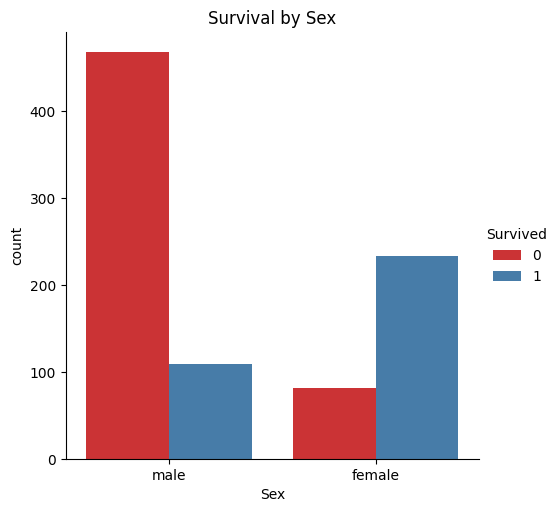

In [20]:
# Create a stacked barplot visualize the relationship between sex and survival
sns.catplot(x="Sex", hue="Survived", kind="count", data=df_train, palette="Set1")
plt.title('Survival by Sex')
plt.show()


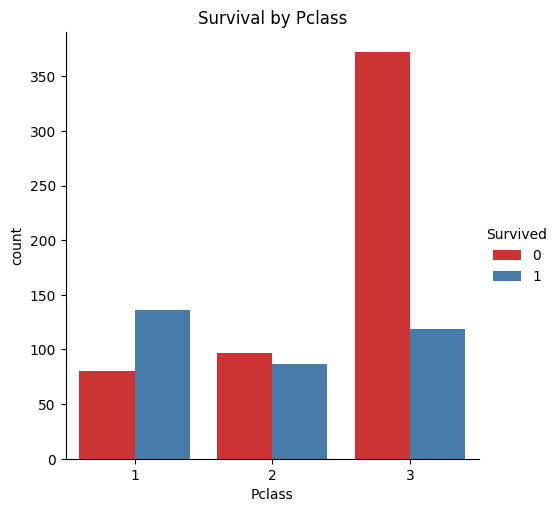

In [21]:
# Create a stacked barplot visualize the relationship between Pclass and Survival
sns.catplot(x="Pclass", hue="Survived", kind="count", data=df_train, palette="Set1")
plt.title('Survival by Pclass')
plt.show()

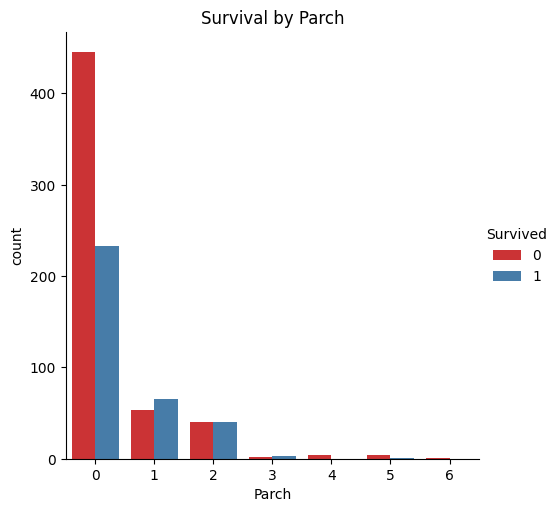

In [22]:
# Create a countplot to visualize the relationship between Parch (number of parents/children) and survival
sns.catplot(x="Parch", hue="Survived", kind="count", data=df_train, palette="Set1")
plt.title('Survival by Parch')
plt.show()

### Data Preprocessing

In [23]:
# Convert string data to numeric
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_train['Sex'] = le.fit_transform(df_train['Sex'])
df_test['Sex'] = le.fit_transform(df_test['Sex'])

In [24]:
#TRAINING DATA

# Create a new dataframe without the Survived column and remove unnecessary columns
X = df_train.drop('Survived', axis=1)

# Create a separate variable for the Survived column
y = df_train['Survived']

# Convert the X and y dataframes to numpy arrays
X_train = X.values
y_train = y.values

# Check the shape of the numpy array
print("Shape of X_train: {}".format(X_train.shape))
print("Shape of y_train: {}".format(y_train.shape))

Shape of X_train: (891, 6)
Shape of y_train: (891,)


In [25]:
# TESTING DATA

# Convert the df_test dataframe to numpy arrays
X_test = df_test.values

# Check the shape of the numpy array
print("Shape of X_test: {}".format(X_test.shape))

Shape of X_test: (418, 6)


### Machine Learning models

#### Linear Regression

In [26]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logistic_regression = LogisticRegression()

# Train the model on the entire dataset
logistic_regression.fit(X_train, y_train)

# Evaluate the model's accuracy on the training data
score = logistic_regression.score(X_train, y_train)
print('Training accuracy on Logistic Regression:', score)

Training accuracy on Logistic Regression: 0.797979797979798


#### Support Vector Machine

In [27]:
from sklearn.svm import SVC

# Initialize the SVM model
svm = SVC(kernel='linear')

# Train the model on the training data
svm.fit(X_train, y_train)

# Evaluate the model's accuracy on the training data
accuracy = svm.score(X_train, y_train)
print('Training accuracy on SVM:', accuracy)

Training accuracy on SVM: 0.7867564534231201


#### Neural Network

In [28]:
import tensorflow as tf

# Define the neural network architecture
neural_network = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(6,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
neural_network.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
neural_network.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model's accuracy on the training data
train_accuracy = neural_network.evaluate(X_train, y_train)
print('Training accuracy on Neural Network:', train_accuracy[1])

Epoch 1/100
28/28 [==============================] - 2s 11ms/step - loss: 0.7975 - accuracy: 0.5814
Epoch 2/100
28/28 [==============================] - 0s 11ms/step - loss: 0.7130 - accuracy: 0.6364
Epoch 3/100
28/28 [==============================] - 0s 11ms/step - loss: 0.7132 - accuracy: 0.6263
Epoch 4/100
28/28 [==============================] - 0s 11ms/step - loss: 0.6835 - accuracy: 0.6465
Epoch 5/100
28/28 [==============================] - 0s 10ms/step - loss: 0.6737 - accuracy: 0.6420
Epoch 6/100
28/28 [==============================] - 0s 11ms/step - loss: 0.6547 - accuracy: 0.6532
Epoch 7/100
28/28 [==============================] - 0s 11ms/step - loss: 0.6575 - accuracy: 0.6611
Epoch 8/100
28/28 [==============================] - 0s 11ms/step - loss: 0.6136 - accuracy: 0.6611
Epoch 9/100
28/28 [==============================] - 0s 11ms/step - loss: 0.6343 - accuracy: 0.6655
Epoch 10/100
28/28 [==============================] - 0s 11ms/step - loss: 0.5940 - accuracy: 0.7172

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict the labels of the training data
y_pred_logistic_train = logistic_regression.predict(X_train)
y_pred_svm_train = svm.predict(X_train)
y_pred_nn_train = neural_network.predict(X_train)
y_pred_nn_train = (y_pred_nn_train > 0.5).astype(int)

# Calculate the accuracy score of your models on the training data
accuracy_logistic_train = accuracy_score(y_train, y_pred_logistic_train)
accuracy_svm_train = accuracy_score(y_train, y_pred_svm_train)
accuracy_nn_train = accuracy_score(y_train, y_pred_nn_train)

# Calculate the confusion matrix of your models on the training data
confusion_matrix_logistic_train = confusion_matrix(y_train, y_pred_logistic_train)
confusion_matrix_svm_train = confusion_matrix(y_train, y_pred_svm_train)
confusion_matrix_nn_train = confusion_matrix(y_train, y_pred_nn_train)

# Calculate the classification report of your models on the training data
classification_report_logistic_train = classification_report(y_train, y_pred_logistic_train)
classification_report_svm_train = classification_report(y_train, y_pred_svm_train)
classification_report_nn_train = classification_report(y_train, y_pred_nn_train)

print("\n")

# Print the results
print('Accuracy score of Logistic Regression on training data:', accuracy_logistic_train)
print('Accuracy score of SVM on training data:', accuracy_svm_train)
print('Accuracy score of Neural Network on training data:', accuracy_nn_train)
print("\n")

print('Confusion matrix of Logistic Regression on training data:')
print(confusion_matrix_logistic_train)
print('Confusion matrix of SVM on training data:')
print(confusion_matrix_svm_train)
print('Confusion matrix of Neural Network on training data:')
print(confusion_matrix_nn_train)
print("\n")

print('Classification report of Logistic Regression on training data:')
print(classification_report_logistic_train)
print('Classification report of SVM on training data:')
print(classification_report_svm_train)
print('Classification report of Neural Network on training data:')
print(classification_report_nn_train)

28/28 [==============================] - 0s 4ms/step


Accuracy score of Logistic Regression on training data: 0.797979797979798
Accuracy score of SVM on training data: 0.7867564534231201
Accuracy score of Neural Network on training data: 0.8271604938271605


Confusion matrix of Logistic Regression on training data:
[[469  80]
 [100 242]]
Confusion matrix of SVM on training data:
[[468  81]
 [109 233]]
Confusion matrix of Neural Network on training data:
[[508  41]
 [113 229]]


Classification report of Logistic Regression on training data:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       549
           1       0.75      0.71      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.78       891
weighted avg       0.80      0.80      0.80       891

Classification report of SVM on training data:
              precision    recall  f1-score   support

           0       0.81 